# Import necessary libraries and load the dataset and create to copy to comapre afterwards

In [30]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler


df=pd.read_csv("loan_approval_dataset.csv")
df.head()

df1_test=df.copy()
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,Approved
1,2,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,4,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


 #      Check if there is any null values in the dataset

In [31]:
df.isnull().sum()



loan_id                       0
 no_of_dependents             2
 education                    4
 self_employed                5
 income_annum                 5
 loan_amount                 16
 loan_term                    2
 cibil_score                  2
 residential_assets_value    13
 commercial_assets_value     13
 luxury_assets_value          6
 bank_asset_value             2
 loan_status                  0
dtype: int64

# Drop the null values rows as there not many

In [32]:
df.dropna(inplace=True)

In [33]:
df.isnull().sum()



loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [34]:
df.dtypes


loan_id                        int64
 no_of_dependents            float64
 education                    object
 self_employed                object
 income_annum                float64
 loan_amount                 float64
 loan_term                   float64
 cibil_score                 float64
 residential_assets_value    float64
 commercial_assets_value     float64
 luxury_assets_value         float64
 bank_asset_value            float64
 loan_status                  object
dtype: object

# Convert the data types  of the columns to int64 for training the model

In [35]:
column_to_convert = [' no_of_dependents',' income_annum',' loan_amount',' loan_term',' cibil_score',' residential_assets_value',
                    ' commercial_assets_value',' luxury_assets_value',' bank_asset_value']

for i in column_to_convert:
    df[i] = df[i].astype("int64")
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

# Check if there are any correlation between two columns greater than 0.8

In [36]:


corr=df.corr()
corr
corr_matrix = df.corr()  # Assuming df is your DataFrame with the correlation matrix

# Find columns with correlation greater than 0.7 at least 2 times
high_corr_columns = []

for column in corr_matrix.columns:
    high_corr_count = (corr_matrix[column] > 0.80).sum() - 1  # Exclude self-correlation
    if high_corr_count >= 2:
        high_corr_columns.append(column)

print("Columns with correlation greater than 0.80 at least 2 times:", high_corr_columns)



Columns with correlation greater than 0.80 at least 2 times: [' income_annum', ' loan_amount', ' luxury_assets_value']


# Check using heatmap

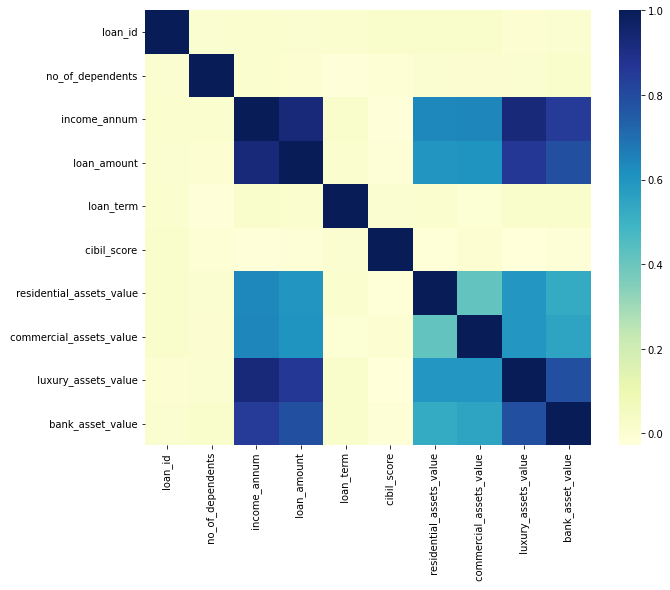

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming corr is your correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr, cmap='YlGnBu')

plt.show()  # Display the heatmap

# Drop the columms

In [38]:
drop=[' income_annum', ' loan_amount', ' luxury_assets_value', ]
df=df.drop(drop,axis=1)

In [39]:

df.describe(include='object')


,education,self_employed,loan_status
count,4222,4222,4222
unique,2,2,2
top,Graduate,Yes,Approved
freq,2120,2127,2625


In [40]:
numcol = []
for col in df.columns:
    if df[col].dtypes == "int64":
        numcol.append(col)
    
print(numcol)

['loan_id', ' no_of_dependents', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' bank_asset_value']


# Scale the values of the numeric columns using scaler

In [41]:
scaler = MinMaxScaler()
for col in numcol:
    df[[col]] = scaler.fit_transform(df[[col]])
    
df.head()

,loan_id,no_of_dependents,education,self_employed,loan_term,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value,loan_status
0,0.000000,0.4,Graduate,No,0.555556,0.796667,0.085616,0.907216,0.544218,Approved
1,0.000234,0.0,Not Graduate,Yes,0.333333,0.195000,0.095890,0.113402,0.224490,Rejected
2,0.000469,0.6,Graduate,No,1.000000,0.343333,0.246575,0.231959,0.870748,Rejected
3,0.000703,0.6,Graduate,No,0.333333,0.278333,0.626712,0.170103,0.537415,Rejected
4,0.000937,1.0,Not Graduate,Yes,1.000000,0.136667,0.428082,0.422680,0.340136,Rejected


# Convert the categorcal value to numeric value using LabelEncoder

In [42]:
le = LabelEncoder()
df[" education"]=le.fit_transform(df[" education"])
df[" self_employed"]=le.fit_transform(df[" self_employed"])
df[" loan_status"]=le.fit_transform(df[" loan_status"])
df.head()

,loan_id,no_of_dependents,education,self_employed,loan_term,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value,loan_status
0,0.000000,0.4,0,0,0.555556,0.796667,0.085616,0.907216,0.544218,0
1,0.000234,0.0,1,1,0.333333,0.195000,0.095890,0.113402,0.224490,1
2,0.000469,0.6,0,0,1.000000,0.343333,0.246575,0.231959,0.870748,1
3,0.000703,0.6,0,0,0.333333,0.278333,0.626712,0.170103,0.537415,1
4,0.000937,1.0,1,1,1.000000,0.136667,0.428082,0.422680,0.340136,1


# Plot the bar diagram of each of the the columns to be sure about wheather the data is biased or not

In [ ]:

num_bins = 10
num_columns = len(df.columns)

# Calculate the number of rows needed for the subplots
num_rows = (num_columns + 2) // 3  # Adding 2 ensures there's enough space for the last row if there are remaining columns

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Iterate through each column in the DataFrame and create histograms
for i, column in enumerate(df.columns):
    ax = axes[i]  # Get the current axis
    df[column].hist(bins=num_bins, ax=ax)  # Create a histogram for the current column
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Hide any remaining empty subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



# Remove a  solution coloumn to make a train data

In [ ]:
df.describe()


In [ ]:
df

In [ ]:

# Assuming you have a DataFrame named 'df' with a column 'residential_assets_value'
# Calculate the mean of the 'residential_assets_value' column
mean_value = df[' residential_assets_value'].mean()

# Replace values greater than the mean with the mean
df.loc[df[' residential_assets_value'] > np.percentile(df[' residential_assets_value'], 75), ' residential_assets_value'] = mean_value
df.loc[df[' residential_assets_value'] < np.percentile(df[' residential_assets_value'], 25), ' residential_assets_value'] = mean_value


mean_value = df[' commercial_assets_value'].mean()

# Replace values greater than the mean with the mean
df.loc[df[' commercial_assets_value'] > np.percentile(df[' commercial_assets_value'], 75), ' commercial_assets_value'] = mean_value
df.loc[df[' residential_assets_value'] < np.percentile(df[' residential_assets_value'], 25), ' residential_assets_value'] = mean_value



In [ ]:

num_bins = 10
num_columns = len(df.columns)

# Calculate the number of rows needed for the subplots
num_rows = (num_columns + 2) // 3  # Adding 2 ensures there's enough space for the last row if there are remaining columns

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Iterate through each column in the DataFrame and create histograms
for i, column in enumerate(df.columns):
    ax = axes[i]  # Get the current axis
    df[column].hist(bins=num_bins, ax=ax)  # Create a histogram for the current column
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Hide any remaining empty subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



In [ ]:
df.describe()

In [ ]:

df = df.drop('loan_id',axis=1)
X = df.drop(" loan_status",axis = 1)
y = df[' loan_status']
X

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,shuffle = True,random_state=42,test_size=0.3)
X

In [ ]:
x_train.shape,x_test.shape

In [ ]:
models = {
    'Logistic Regression':LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifer':DecisionTreeClassifier(),
    'SVM':SVC(),
    'KNN': KNeighborsClassifier()
}

# Getting the accurecy of all the models defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming you have a list of models named 'models'
# Assuming you have training and testing data 'x_train', 'y_train', 'x_test', 'y_test'

# Create lists to store model names, training accuracies, and testing accuracies
model_names = []
train_accuracies = []
test_accuracies = []

# Loop through your models
for i in range(len(models)):
    model = list(models.values())[i]
    print(model)
    model.fit(x_train, y_train)

    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)

    model_name = list(models.keys())[i]
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    # Append data to lists
    model_names.append(model_name)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Calculate y-axis limits
y_max = max(max(train_accuracies), max(test_accuracies)) + 0.05
y_min = min(min(train_accuracies), min(test_accuracies)) - 0.05

# Increase figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train Accuracy')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

# Set y-axis limits
ax.set_ylim([y_min, y_max])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.legend()

# Display the accuracy values on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [ ]:
df1_test.loc[:5,' loan_status']

# Match the predicted values with the real value of the dataset manually

In [ ]:
models
for key, value in models.items():
    prediction = value.predict(X[:5])
    print(f"Model: {key}, Prediction: {prediction}")

    

In [ ]:
x_train.shape

# Train the model using simple neural network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Validation accuracy: {test_accuracy}")

In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)